# Optimal GF for barb

1. Determine the frequency $u$ for which the average FSC progressively computed from the normalized frequency 0.5 is higher than some given threshold $t=0.143$, by default.
2. Compute the corresponding Gaussian filter length $\tau$ whose cut-off frequency is $u$.
3. Filter the image.

Hay que estudiar:
1. Si el valle en la curva SFRC es culpa del filtro separable (comparar con el 2D puro). No es culpa. Por encima de la frecuencia normalizada 0.25 la SFRC no es significativa.
2. Si usando random shuffling y OF es posible obtener una SFRC mejor.

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils        #freq, c_avg = fsc.get_SFRC_curve(denoised)
        #first_half = c_avg[:len(c_avg)>>1]
        #SFRC_curve.append(first_half)
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

In [4]:
try:
    from self_fourier_shell_correlation import fsc_utils as fsc
except:
    !pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"
    from self_fourier_shell_correlation import fsc_utils as fsc

In [5]:
try:
    import denoising.image.gaussian as denoising
except:
    !pip install "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
    import denoising.image.gaussian as denoising

In [6]:
denoiser = denoising.Monochrome_Denoising(logger)

### Inputs

In [7]:
#Args = namedtuple("args", ["input"])
#args = Args("barb_0MMPG.png")
Args = namedtuple("args", ["X", "Y"])
args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png", "barb_0MMPG.png")
#args = Args("http://www.hpca.ual.es/~vruiz/images/lake.png", "lake_0MMPG.png")

In [8]:
X = skimage_io.imread(args.X)

In [9]:
try:
    Y = skimage_io.imread(args.Y)
except FileNotFoundError:
    %run barb_0MMPG.ipynb
    Y = skimage_io.imread(args.Y)

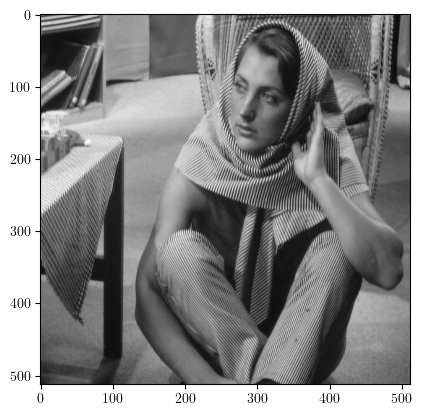

In [10]:
utils.imshow(X)

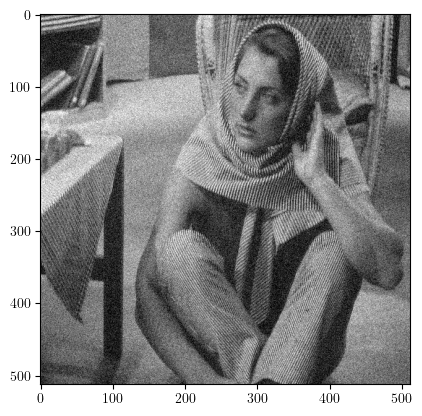

In [11]:
utils.imshow(Y)

### Compute SFRC

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


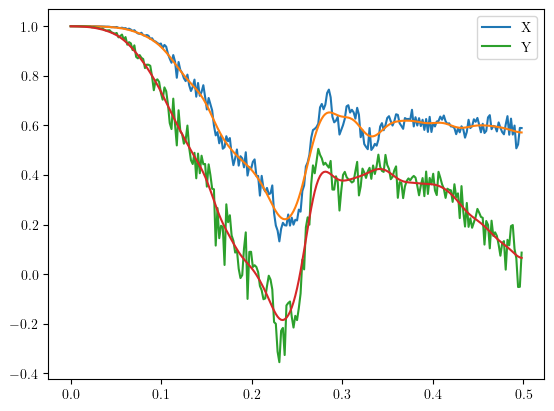

In [12]:
freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__even_odd(X)
freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__even_odd(Y)

from scipy.ndimage import gaussian_filter1d

plt.plot(freq_1, c_avg_Y_1, label="X")
filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
plt.plot(freq_1, filtered_c_avg_Y_1)

plt.plot(freq_2, c_avg_Y_2, label="Y")
filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
plt.plot(freq_2, filtered_c_avg_Y_2)

plt.legend()

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlati

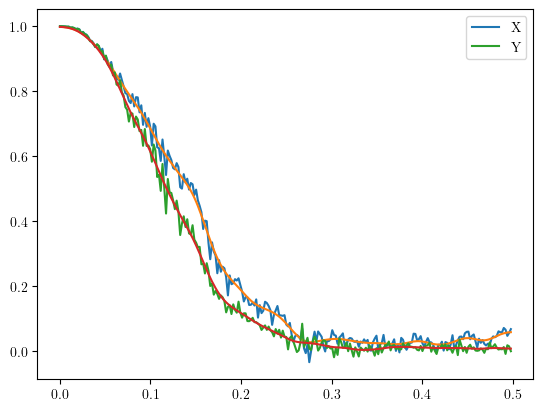

In [13]:
freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__SPRS(X, std_dev=3)
freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__SPRS(Y, std_dev=3)

from scipy.ndimage import gaussian_filter1d

plt.plot(freq_1, c_avg_Y_1, label="X")
filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
plt.plot(freq_1, filtered_c_avg_Y_1)

plt.plot(freq_2, c_avg_Y_2, label="Y")
filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
plt.plot(freq_2, filtered_c_avg_Y_2)

plt.legend()

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


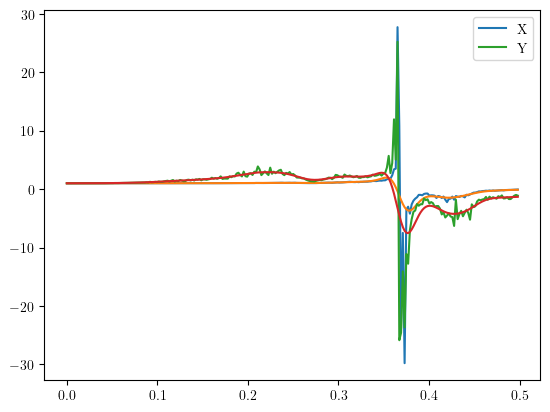

In [14]:
freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__chessboard(X)
freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__chessboard(Y)

from scipy.ndimage import gaussian_filter1d

plt.plot(freq_1, c_avg_Y_1, label="X")
filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
plt.plot(freq_1, filtered_c_avg_Y_1)

plt.plot(freq_2, c_avg_Y_2, label="Y")
filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
plt.plot(freq_2, filtered_c_avg_Y_2)

plt.legend()

std_dev = 0
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 40
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 80
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 120
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 160
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


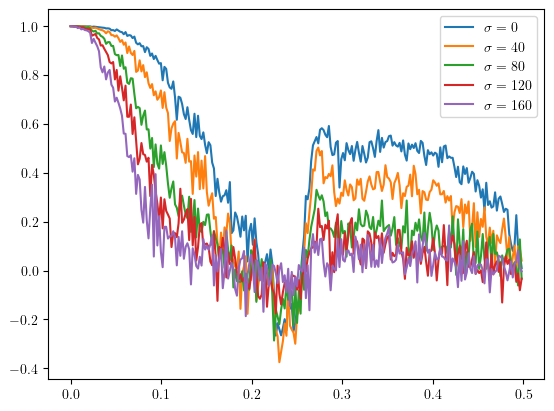

In [15]:
std_devs = [i for i in range(0, 200, 40)]
poisson_ratio = 0.5
gamma = 0.15
for std_dev in std_devs: # Number of noise levels
    PCC_curve = []
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
    print("std_dev =", std_dev)
    freq, c_avg = fsc.get_SFRC_curve__even_odd(Y)
    plt.plot(freq, c_avg, label=rf"$\sigma={std_dev}$")
plt.legend()

std_dev = 0
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 40
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
comput

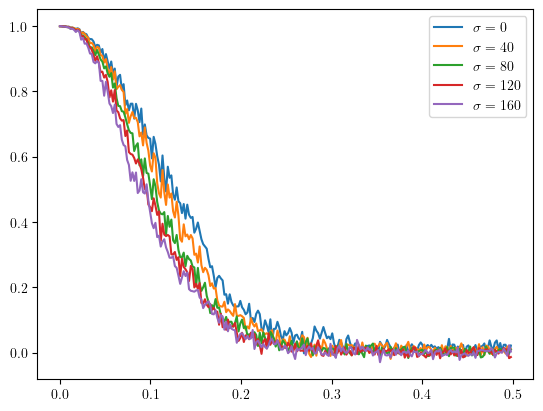

In [16]:
std_devs = [i for i in range(0, 200, 40)]
poisson_ratio = 0.5
gamma = 0.15
for std_dev in std_devs: # Number of noise levels
    PCC_curve = []
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
    print("std_dev =", std_dev)
    freq, c_avg = fsc.get_SFRC_curve__SPRS(Y, std_dev=3)
    plt.plot(freq, c_avg, label=rf"$\sigma={std_dev}$")
plt.legend()

std_dev = 0
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 40
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 80
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 120
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 160
compute_fourier_shell_correlation.shape=(512, 512)


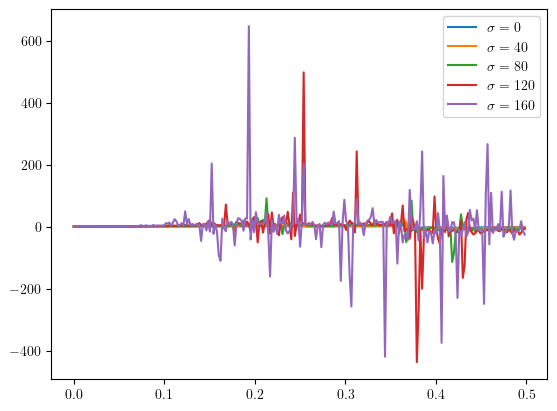

In [17]:
std_devs = [i for i in range(0, 200, 40)]
poisson_ratio = 0.5
gamma = 0.15
for std_dev in std_devs: # Number of noise levels
    PCC_curve = []
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
    print("std_dev =", std_dev)
    freq, c_avg = fsc.get_SFRC_curve__chessboard(Y)
    plt.plot(freq, c_avg, label=rf"$\sigma={std_dev}$")
plt.legend()

std_dev = 0
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 40
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 80
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 120
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 160
compute_fourier_shell_correlation.shape=(512, 512)


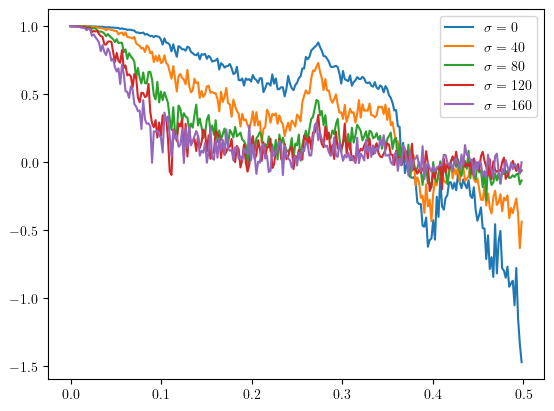

In [18]:
std_devs = [i for i in range(0, 200, 40)]
poisson_ratio = 0.5
gamma = 0.15
for std_dev in std_devs: # Number of noise levels
    PCC_curve = []
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
    print("std_dev =", std_dev)
    freq, c_avg = fsc.get_SFRC_curve__interpolated_chessboard(Y)
    plt.plot(freq, c_avg, label=rf"$\sigma={std_dev}$")
plt.legend()

In [19]:
def estimate_noise(signal):
    noise_estimation = signal[len(signal)-1]
    return noise_estimation
    
def find_cutoff_freq__EO(image, cutoff_corr=0.5):
    freq, c_avg = fsc.get_SFRC_curve__even_odd(image)
    #c_avg = c_avg[0:len(c_avg)>>1]
    filtered_c_avg = gaussian_filter1d(c_avg, 5)
    #min_curve = np.abs(np.min(filtered_c_avg)); cutoff_idx = np.where(filtered_c_avg < min_curve * (1 + beta))[0][0]
    #noise_estimation = estimate_noise(filtered_c_avg); cutoff_idx = np.where(filtered_c_avg < noise_estimation ** beta )[0][0]
    #noise_estimation = estimate_noise(filtered_c_avg); cutoff_idx = np.where(filtered_c_avg < noise_estimation + beta)[0][0]
    cutoff_idx = np.where(filtered_c_avg < filtered_c_avg[0] * cutoff_corr)[0][0]
    cutoff_freq = freq[cutoff_idx>>1]
    #return (cutoff_freq - 0.05)*3
    return (cutoff_freq - 0.00) * 2 # Only half of the frequencies are meaninful

def find_cutoff_freq__CB(image, cutoff_corr=0.5):
    freq, c_avg = fsc.get_SFRC_curve__chessboard(image)
    #c_avg = c_avg[0:len(c_avg)>>1]
    filtered_c_avg = gaussian_filter1d(c_avg, 5)
    #min_curve = np.abs(np.min(filtered_c_avg)); cutoff_idx = np.where(filtered_c_avg < min_curve * (1 + beta))[0][0]
    #noise_estimation = estimate_noise(filtered_c_avg); cutoff_idx = np.where(filtered_c_avg < noise_estimation ** beta )[0][0]
    #noise_estimation = estimate_noise(filtered_c_avg); cutoff_idx = np.where(filtered_c_avg < noise_estimation + beta)[0][0]
    cutoff_idx = np.where(filtered_c_avg < filtered_c_avg[0] * cutoff_corr)[0][0]
    cutoff_freq = freq[cutoff_idx>>1]
    #return (cutoff_freq - 0.05)*3
    return (cutoff_freq - 0.9) * 2 # Only half of the frequencies are meaninful

def find_cutoff_freq__RS(image, cutoff=0.2, std_dev=5):
    freq, c_avg = fsc.get_SFRC_curve__SPRS(image, std_dev)
    #c_avg = c_avg[0:len(c_avg)>>1]
    #freq = freq[0:len(freq)>>1]
    #freq /= 2
    #freq, c_avg = fsc.get_SFRC_curve_EO(image)
    filtered_c_avg = gaussian_filter1d(c_avg, 5)
    #min_curve = np.abs(np.min(filtered_c_avg)); cutoff_idx = np.where(filtered_c_avg < min_curve + beta)[0][0]
    #min_curve = np.abs(np.min(filtered_c_avg)); cutoff_idx = np.where(filtered_c_avg < min_curve * (1 + beta))[0][0]
    cutoff_idx = np.where(filtered_c_avg < filtered_c_avg[0] * cutoff)[0][0]
    #noise_estimation = estimate_noise(filtered_c_avg); cutoff_idx = np.where(filtered_c_avg < noise_estimation ** beta )[0][0]
    #noise_estimation = estimate_noise(filtered_c_avg); cutoff_idx = np.where(filtered_c_avg < noise_estimation + beta)[0][0]
    cutoff_freq = freq[cutoff_idx>>0]
    #return (cutoff_freq - 0.09) * 4
    return (cutoff_freq - 0.12) * 2

In [20]:
def convert_to_tau(eta):
    return 0.141/(eta)

In [21]:
poisson_ratio = 0.5
gamma = 0.15
std_dev = 160
Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape) 

In [22]:
eta_X = find_cutoff_freq__EO(X, cutoff_corr=0.3)
eta_Y = find_cutoff_freq__EO(Y, cutoff_corr=0.3)
print(eta_X)
print(eta_Y)

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
0.21875
0.08203125


In [23]:
tau_X = convert_to_tau(eta_X)
tau_Y = convert_to_tau(eta_Y)
print(tau_X)
print(tau_Y)

0.6445714285714285
1.7188571428571426


In [24]:
eta_X = find_cutoff_freq__RS(X)
eta_Y = find_cutoff_freq__RS(Y)
print(eta_X)
print(eta_Y)

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
0.1740625
0.04906250000000001


In [25]:
tau_X = convert_to_tau(eta_X)
tau_Y = convert_to_tau(eta_Y)
print(tau_X)
print(tau_Y)

0.8100538599640933
2.8738853503184707


### barb_GF_estimation

In [26]:
def find_taus_EO():
    std_devs = [i for i in range(0, 200, 40)]
    PCC_curves = []
    poisson_ratio = 0.5
    gamma = 0.15
    taus_EO = []
    for std_dev in std_devs: # Number of noise levels
        PCC_curve = []
        Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
        eta = find_cutoff_freq__EO(Y)
        tau = convert_to_tau(eta)
        taus_EO.append(tau)
        #sigma = np.array([tau, tau])
        #kernel = [None]*2
        #kernel[0] = utils.get_gaussian_kernel(tau)
        #kernel[1] = utils.get_gaussian_kernel(tau)
        #denoised = denoiser.filter(Y, kernel)
        print("std_dev =", std_dev, "tau =", tau)
        #freq, c_avg = fsc.get_SFRC_curve__even_odd(denoised)
        #freq, c_avg = fsc.get_SFRC_curve_EO(denoised)
        #freq, c_avg = fsc.get_SFRC_curve_EO(Y)
        #freq, c_avg = fsc.get_SFRC_curve_RS(Y, std_dev=3)
        #plt.plot(freq, c_avg, label=f"tau={tau}")
    #plt.legend()
    return taus_EO

In [27]:
N = 2

In [28]:
taus_EO = []
for i in range(N):
    taus_EO.append(find_taus_EO())

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 0 tau = 0.9498947368421051
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 40 tau = 1.1643870967741934
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 80 tau = 1.5039999999999998
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 120 tau = 1.8997894736842103
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 160 tau = 2.1232941176470588
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 0 tau = 0.9255384615384614
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
std_dev = 40 tau = 1.1643870967741934
compute_fourier_shel

In [29]:
def average_lists(lists):
    """
    Computes a list where each element is the average of corresponding elements
    from a list of lists.

    Args:
        lists: A list of lists, where each inner list has the same length.

    Returns:
        A list containing the averages, or an empty list if the input is invalid.
    """

    if not lists:
        return []  # Return empty if the input list is empty

    num_lists = len(lists)
    if num_lists == 0:
      return []

    if not all(isinstance(lst, list) for lst in lists):
      return [] #return empty if not all the elements of the main list are lists

    if not all(len(lst) == len(lists[0]) for lst in lists):
        return []  # Return empty if inner lists have different lengths

    num_elements = len(lists[0])
    avg_list = []

    for j in range(num_elements):
        total = 0
        for i in range(num_lists):
            total += lists[i][j]
        avg_list.append(total / num_lists)

    return avg_list

In [30]:
avg_taus_EO = average_lists(taus_EO)

In [31]:
def find_taus_RS():
    std_devs = [i for i in range(0, 200, 40)]
    PCC_curves = []
    poisson_ratio = 0.5
    gamma = 0.15
    std_dev_RS = 3
    taus_RS = []
    for std_dev in std_devs: # Number of noise levels
        PCC_curve = []
        Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
        eta = find_cutoff_freq__RS(Y, std_dev=std_dev_RS)
        tau = convert_to_tau(eta)
        taus_RS.append(tau)
        #sigma = np.array([tau, tau])
        #kernel = [None]*2
        #kernel[0] = utils.get_gaussian_kernel(tau)
        #kernel[1] = utils.get_gaussian_kernel(tau)
        #denoised = denoiser.filter(Y, kernel)
        print("std_dev =", std_dev, "tau =", tau)
        #freq, c_avg = fsc.get_SFRC_curve__random_shuffling(denoised, std_dev=std_dev_RS)
        #freq, c_avg = fsc.get_SFRC_curve_EO(denoised)
        #freq, c_avg = fsc.get_SFRC_curve_EO(Y)
        #freq, c_avg = fsc.get_SFRC_curve_RS(Y, std_dev=3)
        #plt.plot(freq, c_avg, label=f"tau={tau}")
    #plt.legend()
    return taus_RS

In [32]:
taus_RS = []
for i in range(N):
    taus_RS.append(find_taus_RS())

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 0 tau = 1.2211096075778076
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 40 tau = 1.4122065727699529
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 80 tau = 1.755642023346303
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 120 tau = 2.3197943444730074
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 160 tau = 2.6619469026548668
compute_fourier_shell_correlation.shape=(512,

In [33]:
avg_taus_RS = average_lists(taus_RS)

In [34]:
def find_taus_CB():
    std_devs = [i for i in range(0, 200, 40)]
    PCC_curves = []
    poisson_ratio = 0.5
    gamma = 0.15
    std_dev_RS = 3
    taus_RS = []
    #print("hola")
    for std_dev in std_devs: # Number of noise levels
        PCC_curve = []
        Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
        eta = find_cutoff_freq__CB(Y)
        tau = convert_to_tau(eta)
        taus_RS.append(tau)
        #sigma = np.array([tau, tau])
        #kernel = [None]*2
        #kernel[0] = utils.get_gaussian_kernel(tau)
        #kernel[1] = utils.get_gaussian_kernel(tau)
        #denoised = denoiser.filter(Y, kernel)
        print("std_dev =", std_dev, "tau =", tau)
        #freq, c_avg = fsc.get_SFRC_curve__random_shuffling(denoised, std_dev=std_dev_RS)
        #freq, c_avg = fsc.get_SFRC_curve_EO(denoised)
        #freq, c_avg = fsc.get_SFRC_curve_EO(Y)
        #freq, c_avg = fsc.get_SFRC_curve_RS(Y, std_dev=3)
        #plt.plot(freq, c_avg, label=f"tau={tau}")
    #plt.legend()
    return taus_RS

In [35]:
taus_CB = []
for i in range(N):
    taus_CB.append(find_taus_CB())

compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 0 tau = -0.09787418655097613
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 40 tau = -0.09921935129191863
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 80 tau = -0.08983573917371826
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 120 tau = -0.09787418655097613
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 160 tau = -0.08873156342182889
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 0 tau = -0.10004434589800443
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 40 tau = -0.09787418655097613
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 80 tau = -0.09921935129191863
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 120 tau = -0.09212863705972434
compute_fourier_shell_correlation.shape=(512, 512)
std_dev = 160 tau = -0.0896127110228401


In [36]:
avg_taus_CB = average_lists(taus_CB)

In [37]:
optimal_taus = np.load("barb_GF_optimal_taus.npy")
optimal_taus = optimal_taus.tolist()

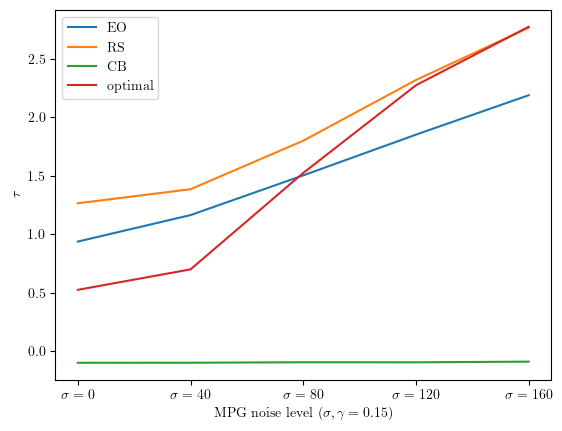

In [38]:
x_labels = [r"$\sigma=0$", r"$\sigma=40$", r"$\sigma=80$", r"$\sigma=120$", r"$\sigma=160$"]
plt.plot(x_labels, avg_taus_EO, label="EO")
plt.plot(x_labels, avg_taus_RS, label="RS")
plt.plot(x_labels, avg_taus_CB, label="CB")
plt.plot(optimal_taus, label="optimal")
plt.xlabel(r"MPG noise level ($\sigma, \gamma=0.15$)")
plt.ylabel(r"$\tau$")
plt.legend()
plt.savefig("barb_GF_estimation.pdf", bbox_inches='tight')